In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
df = pd.read_excel('Cafe_Data_MRA.xlsx')

In [199]:
df.head()

Date Bill Number                        Item Desc      Time  Quantity  \
0 2010-04-01     G0470115  QUA  MINERAL WATER(1000ML)      13:15:11         1   
1 2010-04-01     G0470115  MONSOON MALABAR (AULAIT)        13:15:11         1   
2 2010-04-01     G0470116  MASALA CHAI CUTTING             13:17:35         1   
3 2010-04-01     G0470117  QUA  MINERAL WATER(1000ML)      13:19:55         1   
4 2010-04-01     G0470283  MOROCCAN MINT TEA               01:20:18         1   

    Rate    Tax  Discount   Total  Category  
0   50.0  11.88       0.0   61.88  BEVERAGE  
1  100.0  23.75       0.0  123.75  BEVERAGE  
2   40.0   9.50       0.0   49.50  BEVERAGE  
3   50.0  11.88       0.0   61.88  BEVERAGE  
4   45.0  10.69       0.0   55.69  BEVERAGE

In [176]:
df.describe(include='all')

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Date Bill Number                        Item Desc  \
count                145830       145830                          145830   
unique                  365        69982                             580   
top     2010-12-31 00:00:00     G0490530  NIRVANA HOOKAH SINGLE            
freq                    834           23                            8553   
first   2010-04-01 00:00:00          NaN                             NaN   
last    2011-03-31 00:00:00          NaN                             NaN   
mean                    NaN          NaN                             NaN   
std                     NaN          NaN                             NaN   
min                     NaN          NaN                             NaN   
25%                     NaN          NaN                             NaN   
50%                     NaN          NaN                             NaN   
75%                     NaN          NaN                             NaN   
max                     NaN          NaN                             NaN   

            Time       Quantity           Rate            Tax       Discount  \
count     145830  145830.000000  145830.000000  145830.000000  145830.000000   
unique     36200            NaN            NaN            NaN            NaN   
top     22:25:36            NaN            NaN            NaN            NaN   
freq          33            NaN            NaN            NaN            NaN   
first        NaN            NaN            NaN            NaN            NaN   
last         NaN            NaN            NaN            NaN            NaN   
mean         NaN       1.121299     161.782259      48.929061       0.095079   
std          NaN       0.477237     102.244631      40.272851       3.720735   
min          NaN       1.000000       0.010000       0.000000       0.000000   
25%          NaN       1.000000      95.000000      22.560000       0.000000   
50%          NaN       1.000000     125.000000      32.060000       0.000000   
75%          NaN       1.000000     225.000000      72.000000       0.000000   
max          NaN      30.000000    2100.000000    2731.250000     825.000000   

                Total Category  
count   145830.000000   145830  
unique            NaN        9  
top               NaN     FOOD  
freq              NaN    57023  
first             NaN      NaN  
last              NaN      NaN  
mean       224.959852      NaN  
std        164.960776      NaN  
min          0.010000      NaN  
25%        117.560000      NaN  
50%        167.060000      NaN  
75%        315.000000      NaN  
max      14231.250000      NaN

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [178]:
df.isnull().sum().sum()

0

In [179]:
df['Category'].unique()

array(['BEVERAGE', 'FOOD', 'LIQUOR', 'MERCHANDISE', 'TOBACCO', 'MISC',
       'WINES', 'LIQUOR & TOBACCO', 'LIQUOR '], dtype=object)

In [180]:
df['Category'].replace('LIQUOR ','LIQUOR',inplace=True)

In [181]:
df['Category'].unique()

array(['BEVERAGE', 'FOOD', 'LIQUOR', 'MERCHANDISE', 'TOBACCO', 'MISC',
       'WINES', 'LIQUOR & TOBACCO'], dtype=object)

In [182]:
# to find the correct item desc string value
for i in range(len(df['Item Desc'])):
    if 'AXE TWIST' in df['Item Desc'][i]:
        #print(df[df['Item Desc']==df['Item Desc'][i]])
        axe = df['Item Desc'][i]

In [183]:
# here we can see the item desc with word 'Axe twist' in it
axe

'2 AXE TWIST                   '

In [184]:
# Item '2 AXE TWIST' is categorised as 'BEVERAGE'
df[df['Item Desc']=='2 AXE TWIST                   ']

Date Bill Number                        Item Desc      Time  \
2869 2010-05-16     G0477404  2 AXE TWIST                     01:13:22   

      Quantity   Rate    Tax  Discount   Total  Category  
2869         1  140.0  33.25       0.0  173.25  BEVERAGE

In [185]:
# Item '1 AXE TWIST' is categorised as 'MISC'
df[df['Item Desc']=='1 AXE TWIST                   ']

Date Bill Number                        Item Desc      Time  \
352 2010-06-06     G0480591  1 AXE TWIST                     19:28:07   
353 2010-05-14     G0476912  1 AXE TWIST                     13:57:10   
354 2010-05-15     G0477250  1 AXE TWIST                     01:19:19   
355 2010-05-16     G0477356  1 AXE TWIST                     21:52:10   
356 2010-05-17     G0477462  1 AXE TWIST                     18:01:31   
357 2010-05-28     G0479145  1 AXE TWIST                     17:06:24   

     Quantity  Rate    Tax  Discount  Total Category  
352         1  70.0  16.63       0.0  86.63     MISC  
353         1  70.0  16.63       0.0  86.63     MISC  
354         1  70.0  16.63       0.0  86.63     MISC  
355         1  70.0  16.63       0.0  86.63     MISC  
356         1  70.0  16.63       0.0  86.63     MISC  
357         1  70.0  16.63       0.0  86.63     MISC

Hence, we have to change the category for '2 AXE TWIST' to 'MISC' for better analysis

In [186]:
df.iloc[2869,9] = 'MISC'

In [187]:
# changed the category of '2 AXE TWIST' to 'MISC'
df[df['Item Desc']=='2 AXE TWIST                   ']

Date Bill Number                        Item Desc      Time  \
2869 2010-05-16     G0477404  2 AXE TWIST                     01:13:22   

      Quantity   Rate    Tax  Discount   Total Category  
2869         1  140.0  33.25       0.0  173.25     MISC

In [188]:
df.shape

(145830, 10)

In [189]:
#df['Time'] = pd.to_datetime(df['Time'],format="%H:%M:%S").dt.time

In [190]:
df.head()

Date Bill Number                        Item Desc      Time  Quantity  \
0 2010-04-01     G0470115  QUA  MINERAL WATER(1000ML)      13:15:11         1   
1 2010-04-01     G0470115  MONSOON MALABAR (AULAIT)        13:15:11         1   
2 2010-04-01     G0470116  MASALA CHAI CUTTING             13:17:35         1   
3 2010-04-01     G0470117  QUA  MINERAL WATER(1000ML)      13:19:55         1   
4 2010-04-01     G0470283  MOROCCAN MINT TEA               01:20:18         1   

    Rate    Tax  Discount   Total  Category  
0   50.0  11.88       0.0   61.88  BEVERAGE  
1  100.0  23.75       0.0  123.75  BEVERAGE  
2   40.0   9.50       0.0   49.50  BEVERAGE  
3   50.0  11.88       0.0   61.88  BEVERAGE  
4   45.0  10.69       0.0   55.69  BEVERAGE

In [200]:
df.to_excel('Cafe_Data_MRA_Cleaned1.xlsx', index=False)

In [201]:
dfc = pd.read_excel('Cafe_Data_MRA_Cleaned1.xlsx')

In [202]:
dfc.head()

Date Bill Number                        Item Desc      Time  Quantity  \
0 2010-04-01     G0470115  QUA  MINERAL WATER(1000ML)      13:15:11         1   
1 2010-04-01     G0470115  MONSOON MALABAR (AULAIT)        13:15:11         1   
2 2010-04-01     G0470116  MASALA CHAI CUTTING             13:17:35         1   
3 2010-04-01     G0470117  QUA  MINERAL WATER(1000ML)      13:19:55         1   
4 2010-04-01     G0470283  MOROCCAN MINT TEA               01:20:18         1   

    Rate    Tax  Discount   Total  Category  
0   50.0  11.88       0.0   61.88  BEVERAGE  
1  100.0  23.75       0.0  123.75  BEVERAGE  
2   40.0   9.50       0.0   49.50  BEVERAGE  
3   50.0  11.88       0.0   61.88  BEVERAGE  
4   45.0  10.69       0.0   55.69  BEVERAGE

In [203]:
dfc.shape

(145830, 10)

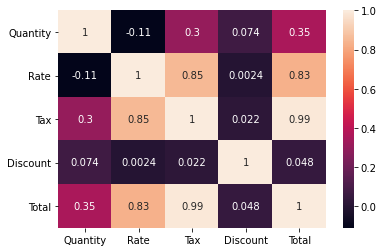

In [207]:
sns.heatmap(df.corr(),annot=True)

Total is highly correlated to rate and tax, as total = rate*(quantity) + tax and might include discount if any.

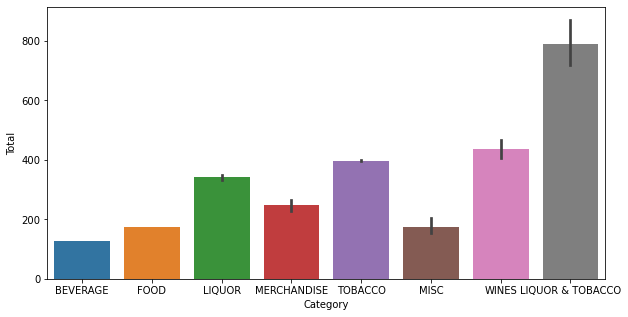

In [213]:
plt.figure(figsize=(10,5))
sns.barplot(df['Category'],df['Total'])

Mean Total for Liquor and Tobacco is high as even though the rate might be high but the overall quantity is minimum.